<a href="https://colab.research.google.com/github/jonhyuk0922/Tensorflow-Dev/blob/main/Course1_4_Using_Real_world_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [9]:
import matplotlib.image as mpimg

#1. ImageGenerator of Human and Horses

##1-1. 데이터 불러오기
말과 사람의 이미지를 분류하는 분류기를 만들어 볼 것이다. 학습데이터는 로렌스가 제공한 링크에서 불러온다.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-04-26 06:55:04--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.5.128, 74.125.206.128, 64.233.167.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.5.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  47.8MB/s    in 3.0s    

2021-04-26 06:55:08 (47.8 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

##1-2. 디렉토리 분류

In [3]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

In [4]:
# 디렉토리 지정 잘 됐는 지 파일들 확인
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse40-0.png', 'horse46-7.png', 'horse23-5.png', 'horse42-0.png', 'horse34-1.png', 'horse39-8.png', 'horse46-0.png', 'horse25-3.png', 'horse05-6.png', 'horse25-9.png']
['human15-00.png', 'human09-24.png', 'human15-26.png', 'human09-15.png', 'human09-12.png', 'human07-01.png', 'human16-06.png', 'human16-30.png', 'human16-05.png', 'human17-10.png']


In [5]:
#디렉토리 별 사진 갯수 확인
print('total training horse images:', len(train_horse_names))
print('total training human images:', len(train_human_names))

total training horse images: 500
total training human images: 527


In [6]:
%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

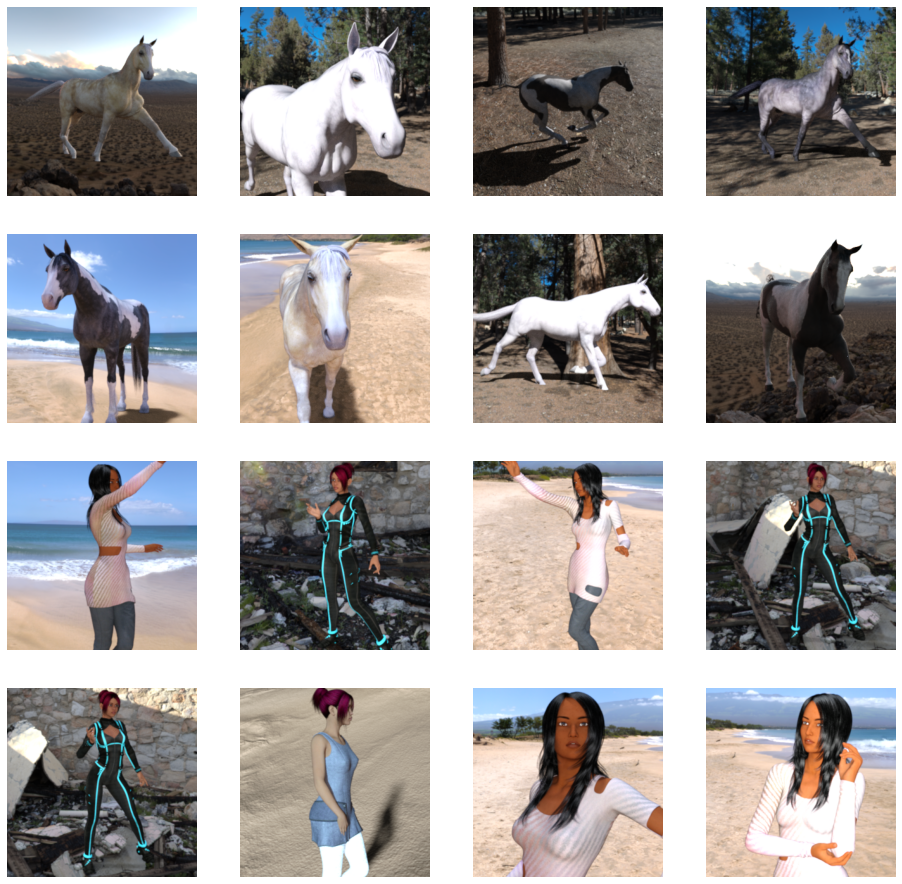

In [10]:

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

##1-3. 간단한 모델 구현

In [11]:
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape = (300,300,3)),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                             tf.keras.layers.MaxPooling2D(2,2),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(512, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 64)        3

##1-4. 모델 컴파일

In [13]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy', optimizer=RMSprop(lr=0.001), metrics=['accuracy'])

##1-5. Data Preprocessing

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255) #이미지 정규화 

train_generator = train_datagen.flow_from_directory(
    '/tmp/horse-or-human',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1027 images belonging to 2 classes.


##1-6. Training

In [16]:
history = model.fit(
    train_generator,
    steps_per_epoch=8,
    epochs=15,
    verbose=1
)

Epoch 1/15
8/8 [==============================] - 40s 773ms/step - loss: 0.9009 - accuracy: 0.5127
Epoch 2/15
8/8 [==============================] - 7s 823ms/step - loss: 2.0846 - accuracy: 0.6825
Epoch 3/15
8/8 [==============================] - 7s 819ms/step - loss: 0.5098 - accuracy: 0.8295
Epoch 4/15
8/8 [==============================] - 7s 950ms/step - loss: 0.7705 - accuracy: 0.7067
Epoch 5/15
8/8 [==============================] - 7s 817ms/step - loss: 0.3243 - accuracy: 0.8553
Epoch 6/15
8/8 [==============================] - 7s 825ms/step - loss: 0.2364 - accuracy: 0.8932
Epoch 7/15
8/8 [==============================] - 7s 830ms/step - loss: 0.1867 - accuracy: 0.9236
Epoch 8/15
8/8 [==============================] - 7s 835ms/step - loss: 0.0966 - accuracy: 0.9562
Epoch 9/15
8/8 [==============================] - 7s 991ms/step - loss: 0.2058 - accuracy: 0.9239
Epoch 10/15
8/8 [==============================] - 8s 962ms/step - loss: 1.3154 - accuracy: 0.7905
Epoch 11/15
8/8 [=

##1-7. 이미지 분류기 실행

In [17]:
from google.colab import files
from keras.preprocessing import image

uploaded =files.upload()

for fn in uploaded.keys():
  #predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300,300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images =np.vstack([x]) #두개의 배열 붙일 때 사용
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0] > 0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving 바다_여름.png to 바다_여름.png
[1.]
바다_여름.pngis a human
